In [297]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set_context("paper", font_scale=2.0)
%matplotlib inline

In [3]:
data_files = ["fertilizer_data/"+i for i in os.listdir("fertilizer_data/")]

In [323]:
df_fertilizers = pd.DataFrame.from_csv(data_files[0])
del df_fertilizers["Unnamed: 6"]
del df_fertilizers["Unnamed: 7"]
del df_fertilizers["Unnamed: 8"]
df_fertilizers.columns = ['Month','Product', 'State', 'Requirement(in MT)', 'Availability(in MT)']

for f in data_files[1:]:
    df  = pd.DataFrame.from_csv(f)
    if len(df.columns)>5:
        del df["Unnamed: 6"]
        del df["Unnamed: 7"]
        del df["Unnamed: 8"]
        df = df.dropna()
    df.columns = ['Month','Product', 'State', 'Requirement(in MT)', 'Availability(in MT)']
    df_fertilizers = df_fertilizers.append(df)
df_fertilizers = df_fertilizers.dropna()
df_fertilizers = df_fertilizers.reset_index()

In [317]:
df_pivot = df_fertilizers.pivot_table(aggfunc="sum", columns=['Year', 'State', 'Product', 'Month'])

In [318]:
df_fertilizers.head()

,Year,Month,Product,State,Requirement(in MT),Availability(in MT)
0,2014-2015,January,DAP,Andaman & Nicobar,0,0
1,2014-2015,January,MAP,Andaman & Nicobar,0,0
2,2014-2015,January,MOP,Andaman & Nicobar,0,0
3,2014-2015,January,NPK,Andaman & Nicobar,0,0
4,2014-2015,January,TSP,Andaman & Nicobar,0,0


In [319]:
df_pivot.head(10)

Availability(in MT)  \
Year    State             Product Month                          
2012-13 Andaman & Nicobar DAP     April                      0   
                                  August                   500   
                                  December                   0   
                                  February                   0   
                                  January                    0   
                                  July                       0   
                                  June                       0   
                                  March                      0   
                                  May                        0   
                                  November                   0   

                                           Requirement(in MT)  
Year    State             Product Month                        
2012-13 Andaman & Nicobar DAP     April                    50  
                                  August                  100  
                                  December                600  
                                  February                  0  
                                  January                   0  
                                  July                    100  
                                  June                    100  
                                  March                     0  
                                  May                      80  
                                  November                  0

In [320]:
m = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
n = [ "July", "May", "June",  "August", "September"]
sorted(n, key=m.index)

['May', 'June', 'July', 'August', 'September']

In [362]:
def plot_state(state,time):
    plt.figure(figsize=(20,12))
    
    plt.suptitle("Consumption of fertilizers in {} ({})".format(state, time), fontsize=20)
    font = {'weight' : 'normal',
            'size'   : 18}

    matplotlib.rc('font', **font)
    ax = plt.subplot(111)
    for i in set(df_fertilizers.Product.values):
        df_state = df_fertilizers[(df_fertilizers['State']==state) & 
           (df_fertilizers['Year']==time) & 
           (df_fertilizers['Product']==i)]
        df_state = df_state.set_index(["Year"])
        df_state = df_state.drop_duplicates(keep=False)
        df_state = df_state.reset_index()
        ax.plot(range(len(df_state['Availability(in MT)'].values)), df_state['Availability(in MT)'].values, label=i)
    plt.xticks([i for i in range(len(df_state['Availability(in MT)'].values))],
               df_state['Month'].values, 
               rotation=120)
    ax.legend(loc='upper left')

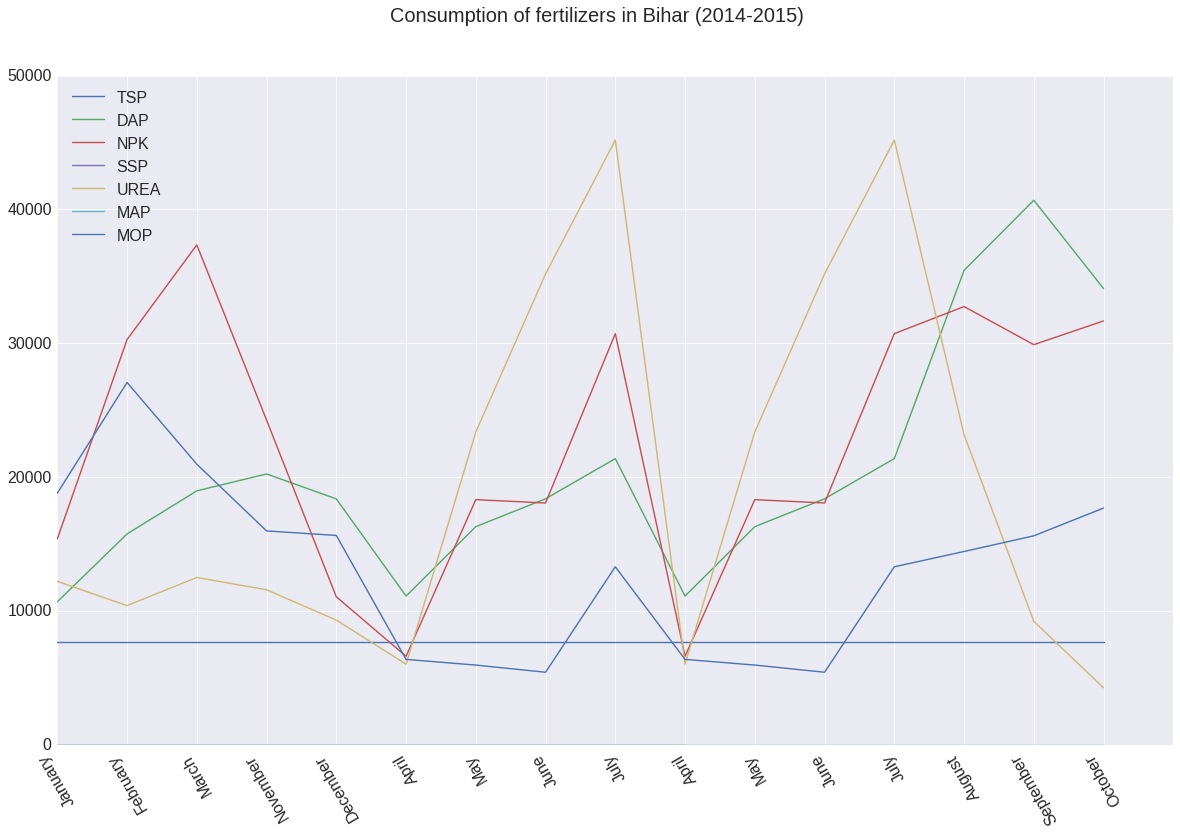

In [363]:
plot_state("Bihar", "2014-2015")

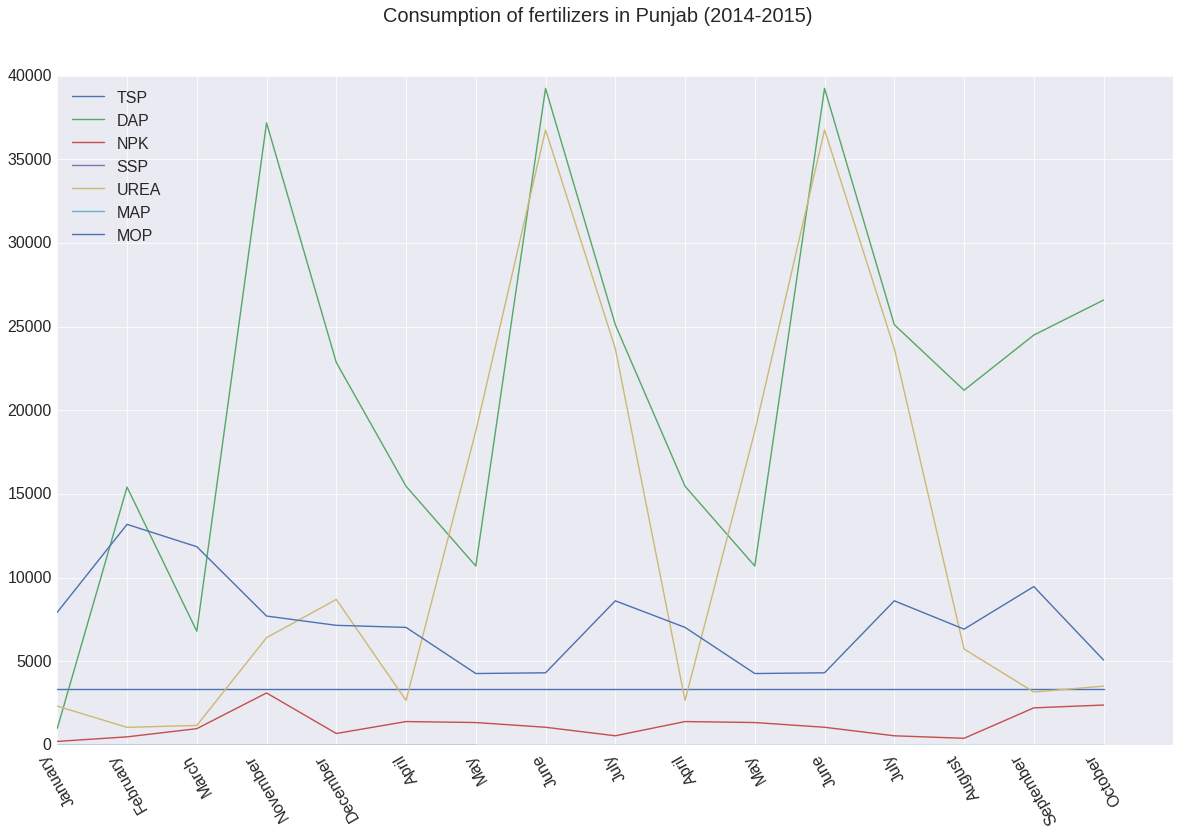

In [364]:
plot_state("Punjab", "2014-2015")

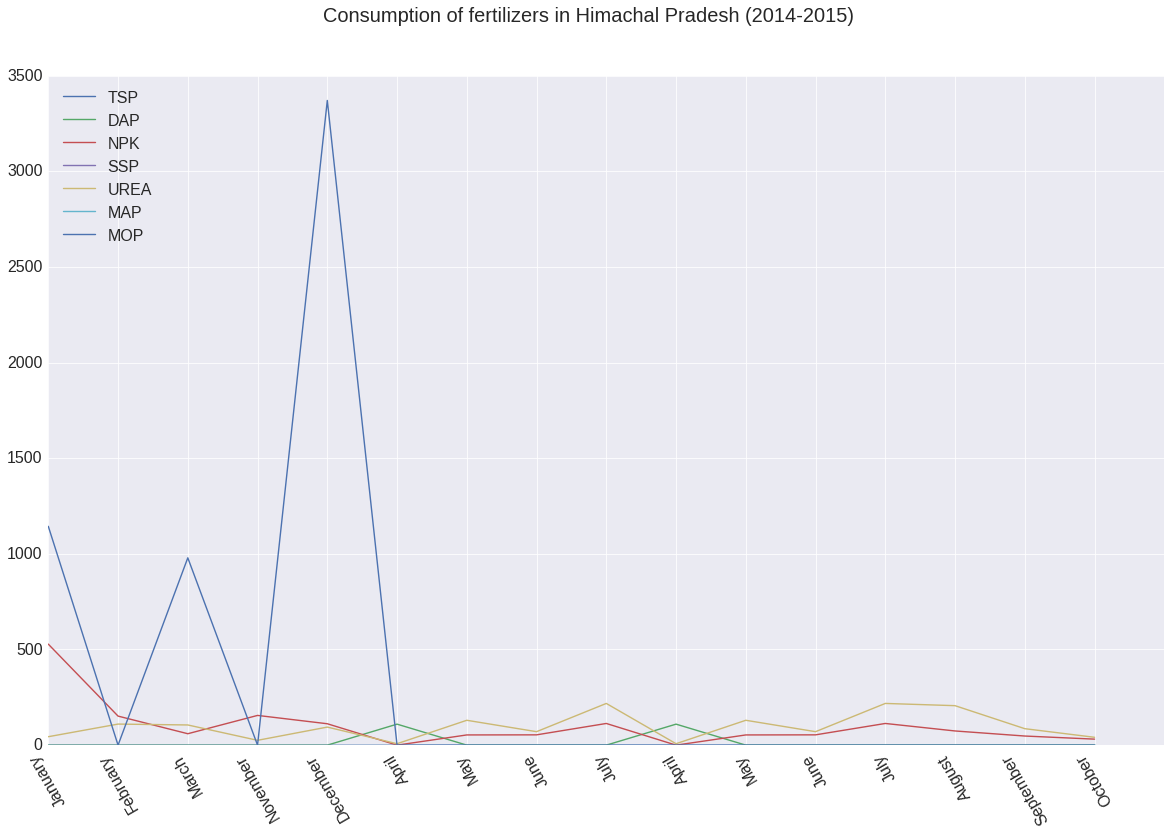

In [366]:
plot_state("Himachal Pradesh", "2014-2015")

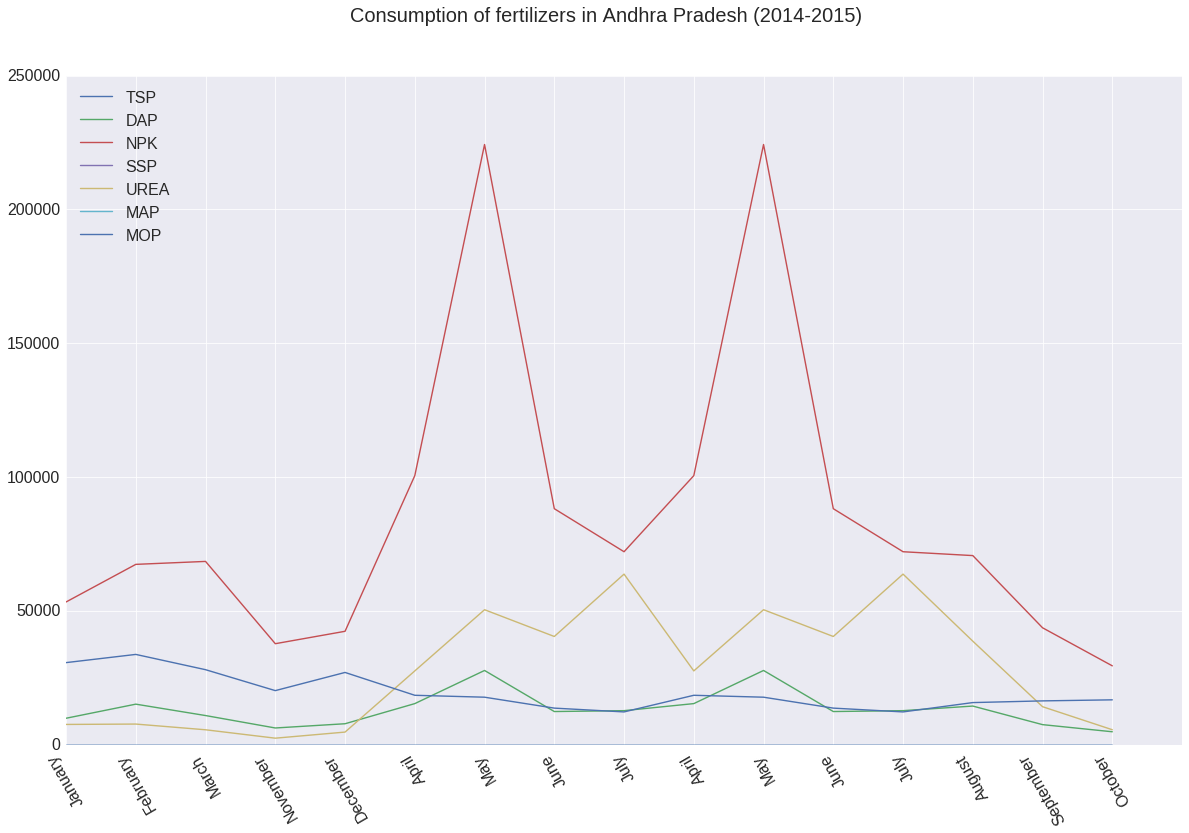

In [367]:
plot_state("Andhra Pradesh", "2014-2015")